# Superstore Sales Project 💯, 💸

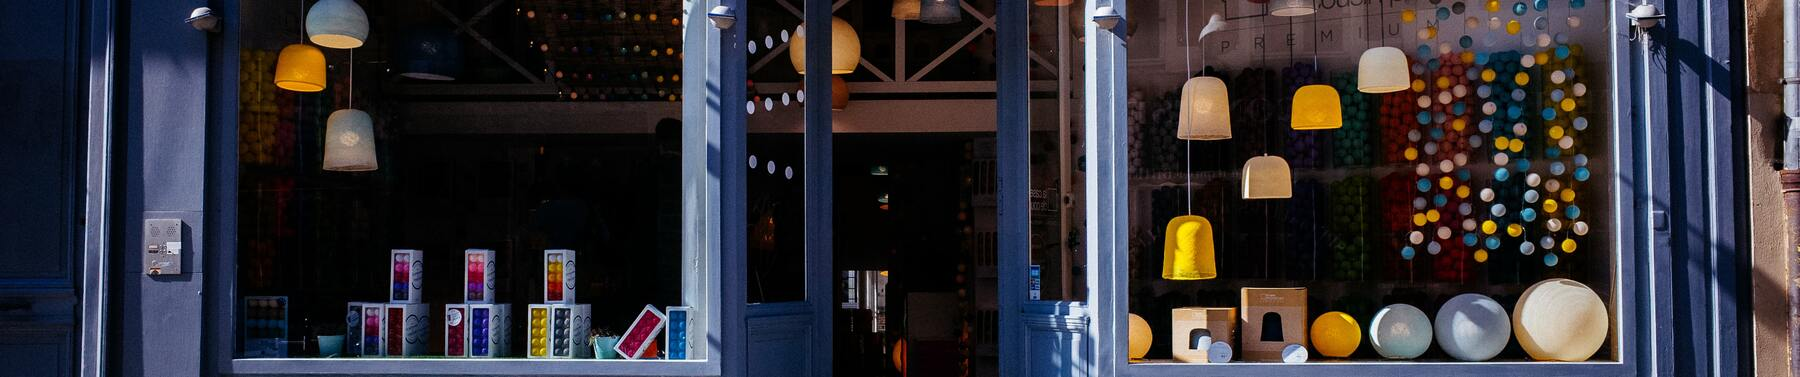

* Row ID => Unique ID for each row.
* Order ID => Unique Order ID for each Customer.
* Order Date => Order Date of the product.
* Ship Date => Shipping Date of the Product.
* Ship Mode=> Shipping Mode specified by the Customer.
* Customer ID => Unique ID to identify each Customer.
* Customer Name => Name of the Customer.
* Segment => The segment where the Customer belongs.
* Country => Country of residence of the Customer.
* City => City of residence of of the Customer.
* State => State of residence of the Customer.
* Postal Code => Postal Code of every Customer.
* Region => Region where the Customer belong.
* Product ID => Unique ID of the Product.
* Category => Category of the product ordered.
* Sub-Category => Sub-Category of the product ordered.
* Product Name => Name of the Product
* Sales => Sales of the Product.

## **Project Superstore Sales**


Retail dataset of a global superstore for 4 years. [link Dataset](https://www.kaggle.com/datasets/rohitsahoo/sales-forecasting/data)

In [44]:
#import Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [45]:
#Read file Csv to Explore Data
data=pd.read_csv("/content/Superstore Sales Dataset.csv")
data.head(3)

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales
0,1,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.96
1,2,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.94
2,3,CA-2017-138688,12/06/2017,16/06/2017,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036.0,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.62


## **Explore Data to See information about simple `Super Store` Data**

In [46]:
#this function i used to information abiyt data like how missing data and datatypes , names columns
# we can note here that no exist Missing Data expect postal code to Deal with because 9800 entries output data 9800 entries
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9800 entries, 0 to 9799
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Row ID         9800 non-null   int64  
 1   Order ID       9800 non-null   object 
 2   Order Date     9800 non-null   object 
 3   Ship Date      9800 non-null   object 
 4   Ship Mode      9800 non-null   object 
 5   Customer ID    9800 non-null   object 
 6   Customer Name  9800 non-null   object 
 7   Segment        9800 non-null   object 
 8   Country        9800 non-null   object 
 9   City           9800 non-null   object 
 10  State          9800 non-null   object 
 11  Postal Code    9789 non-null   float64
 12  Region         9800 non-null   object 
 13  Product ID     9800 non-null   object 
 14  Category       9800 non-null   object 
 15  Sub-Category   9800 non-null   object 
 16  Product Name   9800 non-null   object 
 17  Sales          9800 non-null   float64
dtypes: float

In [47]:
# using function Describe to see describtion for Category Data
data.describe(include='O')

,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Region,Product ID,Category,Sub-Category,Product Name
count,9800,9800,9800,9800,9800,9800,9800,9800,9800,9800,9800,9800,9800,9800,9800
unique,4922,1230,1326,4,793,793,3,1,529,49,4,1861,3,17,1849
top,CA-2018-100111,05/09/2017,26/09/2018,Standard Class,WB-21850,William Brown,Consumer,United States,New York City,California,West,OFF-PA-10001970,Office Supplies,Binders,Staple envelope
freq,14,38,34,5859,35,35,5101,9800,891,1946,3140,19,5909,1492,47


In [48]:
data.describe()

,Row ID,Postal Code,Sales
count,9800.000000,9789.000000,9800.000000
mean,4900.500000,55273.322403,230.769059
std,2829.160653,32041.223413,626.651875
min,1.000000,1040.000000,0.444000
25%,2450.750000,23223.000000,17.248000
50%,4900.500000,58103.000000,54.490000
75%,7350.250000,90008.000000,210.605000
max,9800.000000,99301.000000,22638.480000


## see how many unique values in each of State, Product ID, Category, Sub-Category, and Ship Mode

In [49]:
print(' There are stores in {} states'.format(len(data['State'].unique())))
print(' The are {} different products'.format(len(data['Product ID'].unique())))
print(' There are {} different categories'.format(len(data['Category'].unique())))
print(' There are {} different sub categories'.format(len(data['Sub-Category'].unique())))
print(' There are {} different ship mode'.format(len(data['Ship Mode'].unique())))

 There are stores in 49 states
 The are 1861 different products
 There are 3 different categories
 There are 17 different sub categories
 There are 4 different ship mode


## **Remove Missing data In column `postal code` column**

In [50]:
data.isnull().sum()
# there is 11 missing data in column Postal code


Row ID            0
Order ID          0
Order Date        0
Ship Date         0
Ship Mode         0
Customer ID       0
Customer Name     0
Segment           0
Country           0
City              0
State             0
Postal Code      11
Region            0
Product ID        0
Category          0
Sub-Category      0
Product Name      0
Sales             0
dtype: int64

In [51]:
#remove missing data in column postal code
missing = data.dropna(subset=['Postal Code','Region','Product ID','Category','Sub-Category','Product Name','Sales'])

In [52]:
#to make sure
missing.isnull().sum()

Row ID           0
Order ID         0
Order Date       0
Ship Date        0
Ship Mode        0
Customer ID      0
Customer Name    0
Segment          0
Country          0
City             0
State            0
Postal Code      0
Region           0
Product ID       0
Category         0
Sub-Category     0
Product Name     0
Sales            0
dtype: int64

In [53]:
#function to explore data types
# we can see propblem order data  , ship date , ship mode << change from object datatype to << datatime
data.dtypes

Row ID             int64
Order ID          object
Order Date        object
Ship Date         object
Ship Mode         object
Customer ID       object
Customer Name     object
Segment           object
Country           object
City              object
State             object
Postal Code      float64
Region            object
Product ID        object
Category          object
Sub-Category      object
Product Name      object
Sales            float64
dtype: object

### **in this point i will change datatype  `Order Date` ,`Ship Date`  to Date**

In [54]:
data['Order Date'] = pd.to_datetime(data['Order Date'], format='%d/%m/%Y')
data['Ship Date'] = pd.to_datetime(data['Order Date'], format='%d/%m/%Y')
data.dtypes

Row ID                    int64
Order ID                 object
Order Date       datetime64[ns]
Ship Date        datetime64[ns]
Ship Mode                object
Customer ID              object
Customer Name            object
Segment                  object
Country                  object
City                     object
State                    object
Postal Code             float64
Region                   object
Product ID               object
Category                 object
Sub-Category             object
Product Name             object
Sales                   float64
dtype: object

In [55]:
data["Region"].unique()

array(['South', 'West', 'Central', 'East'], dtype=object)

In [56]:
data["Segment"].unique()

array(['Consumer', 'Corporate', 'Home Office'], dtype=object)

In [57]:
data["State"].unique()

array(['Kentucky', 'California', 'Florida', 'North Carolina',
       'Washington', 'Texas', 'Wisconsin', 'Utah', 'Nebraska',
       'Pennsylvania', 'Illinois', 'Minnesota', 'Michigan', 'Delaware',
       'Indiana', 'New York', 'Arizona', 'Virginia', 'Tennessee',
       'Alabama', 'South Carolina', 'Oregon', 'Colorado', 'Iowa', 'Ohio',
       'Missouri', 'Oklahoma', 'New Mexico', 'Louisiana', 'Connecticut',
       'New Jersey', 'Massachusetts', 'Georgia', 'Nevada', 'Rhode Island',
       'Mississippi', 'Arkansas', 'Montana', 'New Hampshire', 'Maryland',
       'District of Columbia', 'Kansas', 'Vermont', 'Maine',
       'South Dakota', 'Idaho', 'North Dakota', 'Wyoming',
       'West Virginia'], dtype=object)

In [58]:
data["Category"].unique()

array(['Furniture', 'Office Supplies', 'Technology'], dtype=object)

In [59]:
data["Sub-Category"].unique()

array(['Bookcases', 'Chairs', 'Labels', 'Tables', 'Storage',
       'Furnishings', 'Art', 'Phones', 'Binders', 'Appliances', 'Paper',
       'Accessories', 'Envelopes', 'Fasteners', 'Supplies', 'Machines',
       'Copiers'], dtype=object)

## **Next Step i will Use  `Exploratory Data Analysis` To Explore Data**

<ipython-input-60-2187735634e3>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=sales_by_city, x='City', y='Sales', palette='Set2')


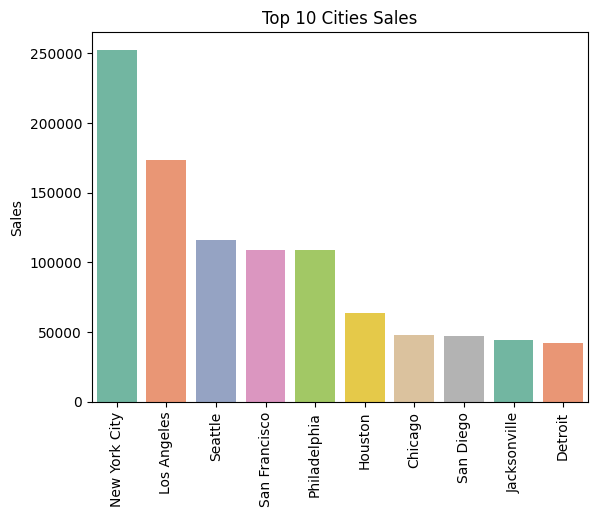

In [60]:
# Assuming df is your DataFrame
sales_by_city =data.groupby('City')['Sales'].sum().round().reset_index().sort_values('Sales', ascending=False).head(10)

# Create a bar plot using Seaborn
#plt.figure(figsize=(10, 6))  # Adjust the figure size if needed
sns.barplot(data=sales_by_city, x='City', y='Sales', palette='Set2')
plt.title('Top 10 Cities Sales')
plt.xlabel("")
plt.ylabel("Sales")
plt.xticks(rotation=90)
plt.show()


<ipython-input-61-0fd9eef29954>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=data, x='Segment', palette='Set2')


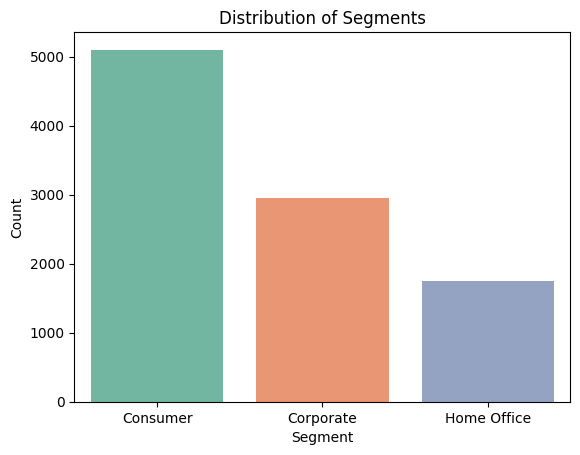

In [61]:
sns.countplot(data=data, x='Segment', palette='Set2')
plt.title('Distribution of Segments')
plt.xlabel("Segment")
plt.ylabel("Count")
plt.show()

In [62]:
#Extract Year date from column Date to vualize it
data['Year'] = data['Ship Date'].dt.year
data['Month'] = data['Ship Date'].dt.month

data.head(2)

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Year,Month
0,1,CA-2017-152156,2017-11-08,2017-11-08,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.96,2017,11
1,2,CA-2017-152156,2017-11-08,2017-11-08,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.94,2017,11


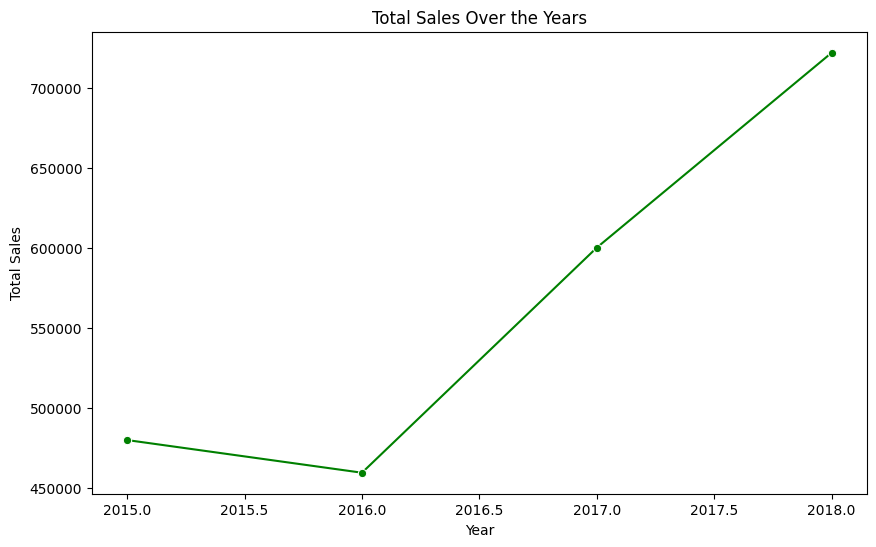

In [63]:

sales_by_year = data.groupby('Year')['Sales'].sum().reset_index()

# Create line plot using Seaborn
plt.figure(figsize=(10, 6))
sns.lineplot(data=sales_by_year, x='Year', y='Sales', marker='o', color='green')
plt.title('Total Sales Over the Years')
plt.xlabel("Year")
plt.ylabel("Total Sales")
plt.show()

<ipython-input-64-bd2b270e3cac>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=data, x='Region', palette='rocket')


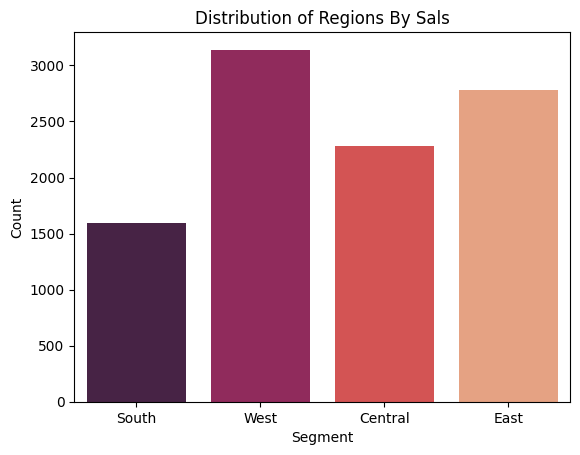

In [64]:
sns.countplot(data=data, x='Region', palette='rocket')
plt.title('Distribution of Regions By Sals')
plt.xlabel("Segment")
plt.ylabel("Count")
plt.show()

<ipython-input-65-dcc69273a1f8>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Category', y='Sales', data=data ,palette="cubehelix")


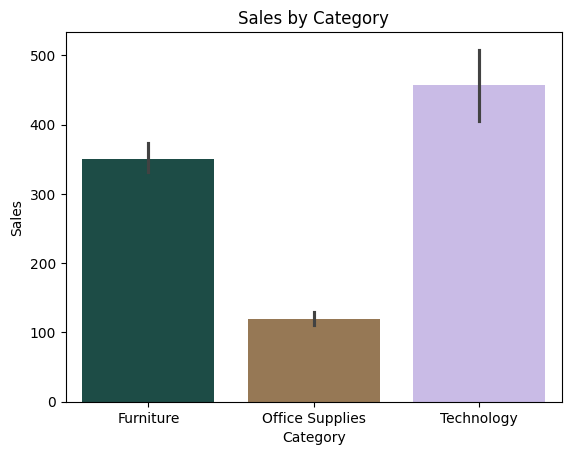

In [65]:
sns.barplot(x='Category', y='Sales', data=data ,palette="cubehelix")
plt.title('Sales by Category')
plt.show()

In [66]:
# i have 12 unique month
data['Month'].unique()

array([11,  6, 10,  4, 12,  5,  8,  7,  9,  1,  3,  2], dtype=int32)

<ipython-input-67-6aaa92d4e9a5>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Month', y='Sales', data=data ,palette='cubehelix')


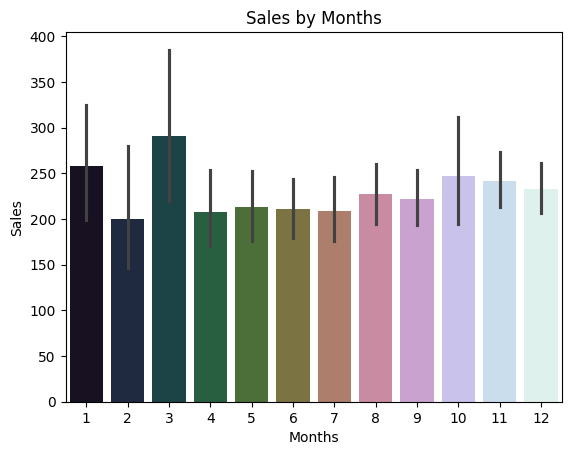

In [67]:
sns.barplot(x='Month', y='Sales', data=data ,palette='cubehelix')
plt.title('Sales by Months')
plt.xlabel('Months')
plt.ylabel('Sales')
plt.show()

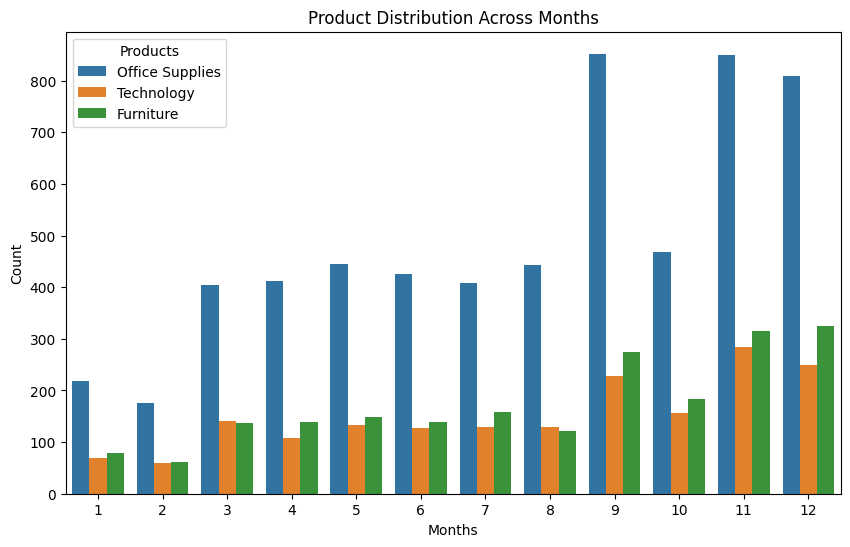

In [68]:
plt.figure(figsize=(10, 6))
sns.countplot(data=data, x='Month', hue='Category')
plt.title('Product Distribution Across Months')
plt.xlabel('Months')
plt.ylabel('Count')
plt.legend(title='Products')
plt.show()

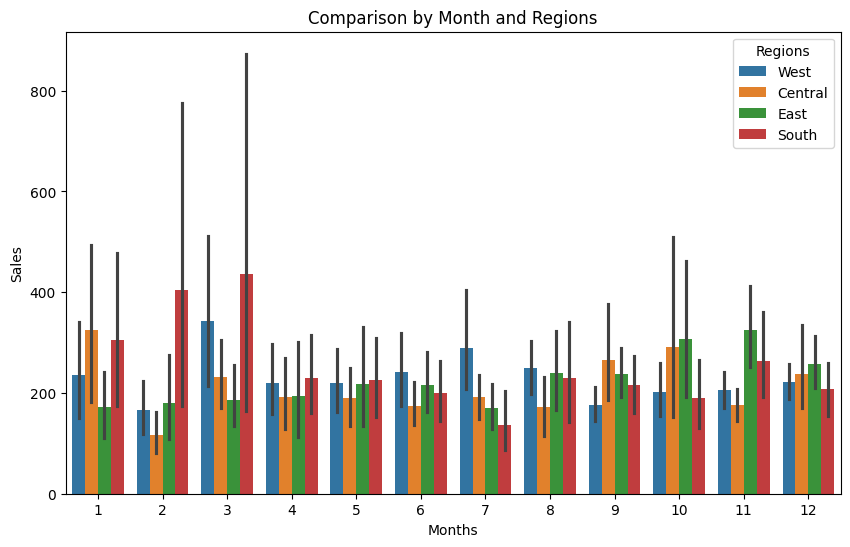

In [69]:
plt.figure(figsize=(10, 6))
sns.barplot(x='Month', y='Sales', hue='Region', data=data)
plt.title('Comparison by Month and Regions')
plt.xlabel('Months')
plt.ylabel('Sales')
#plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.legend(title='Regions')  # Add legend with title
plt.show()

# Mchine Learning Model `Using Library scikit-learn`

In [70]:
data.head(2)

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Year,Month
0,1,CA-2017-152156,2017-11-08,2017-11-08,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.96,2017,11
1,2,CA-2017-152156,2017-11-08,2017-11-08,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.94,2017,11


In [71]:
def count_products(subcategory):
    return data[data['Sub-Category'] == subcategory].shape[0]

# Apply the function to create a new column called 'amount_of_products'
data['amount_of_products'] = data['Sub-Category'].apply(count_products)

data.head(2)

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Year,Month,amount_of_products
0,1,CA-2017-152156,2017-11-08,2017-11-08,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420.0,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.96,2017,11,226
1,2,CA-2017-152156,2017-11-08,2017-11-08,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420.0,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.94,2017,11,607


In [72]:
data['revenue'] = data['amount_of_products'] * data['Sales']
data.head(1)


,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Region,Product ID,Category,Sub-Category,Product Name,Sales,Year,Month,amount_of_products,revenue
0,1,CA-2017-152156,2017-11-08,2017-11-08,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.96,2017,11,226,59202.96


In [73]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error
# Define the model
reg = LinearRegression()

# Split data into features (X) and target variable (Y)
X = data[['Month', 'amount_of_products', 'revenue']]
Y = data['Sales']

# Split the data into training and testing sets
trainX, testX, trainY, testY = train_test_split(X, Y, test_size=0.3, random_state=0)

# Fit the model on the training data
reg.fit(trainX, trainY)

# Make predictions on the testing data
predictions = reg.predict(testX)

# Evaluate the model
accuracy = reg.score(testX, testY) * 100
r2 = r2_score(testY, predictions)
mse = mean_squared_error(testY, predictions)
rmse = np.sqrt(mse)

print(f'Accuracy: {accuracy:.2f} %')
print(f'R²: {r2:.2f}')
print(f'MSE: {mse:.2f}')
print(f'RMSE: {rmse:.2f}')

# Create a DataFrame to display actual vs predicted values
df = pd.DataFrame({'Real': testY, 'Predict': predictions})

print(df.head())


Accuracy: 44.03 %
R²: 0.44
MSE: 243466.53
RMSE: 493.42
         Real     Predict
1270  102.336  183.723830
272     5.280   67.346999
8308   37.170  135.864477
8494    6.080 -107.997542
2784   23.976   92.511362


In [74]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_squared_error
# Split data into features (X) and target variable (Y)
X = data[['Month', 'amount_of_products','revenue']]
Y = data['Sales']

# Split the data into training and testing sets
trainX, testX, trainY, testY = train_test_split(X, Y, test_size=0.3, random_state=0)

#  Random Forest Regressor model
reg = RandomForestRegressor(n_estimators=100, random_state=0)

# Fit the model on the training data
reg.fit(trainX, trainY)

# Make predictions on the testing data
predictions = reg.predict(testX)

# Evaluate the model
r2 = r2_score(testY, predictions)
mse = mean_squared_error(testY, predictions)
rmse = np.sqrt(mse)

print(f'R²: {r2}')
print(f'MSE: {mse}')
print(f'RMSE: {rmse}')

# Evaluate the model
accuracy = reg.score(testX, testY)
print(f'Accuracy: {accuracy*100}%')
df = pd.DataFrame({'Real': testY, 'Predict': predictions})
print(df.head())


R²: 0.9288382341791607
MSE: 30954.549457193392
RMSE: 175.93905040437554
Accuracy: 92.88382341791606%
         Real    Predict
1270  102.336  102.13742
272     5.280    5.40474
8308   37.170   37.22408
8494    6.080    6.09593
2784   23.976   23.97122


In [75]:
# Import the necessary library
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.tree import DecisionTreeRegressor

# Split data into features (X) and target variable (Y)
X = data[['Month', 'amount_of_products', 'revenue']]
Y = data['Sales']

# Split the data into training and testing sets
trainX, testX, trainY, testY = train_test_split(X, Y, test_size=0.3, random_state=0)

# Decision Tree Regressor model
reg = DecisionTreeRegressor(random_state=0)

# Fit the model on the training data
reg.fit(trainX, trainY)

# Make predictions on the testing data
predictions = reg.predict(testX)

# Evaluate the model
accuracy = reg.score(testX, testY)
r2 = r2_score(testY, predictions)
mse = mean_squared_error(testY, predictions)
rmse = np.sqrt(mse)

print(f'Accuracy: {accuracy*100}%')
print(f'R²: {r2}')
print(f'MSE: {mse}')
print(f'RMSE: {rmse}')

# Evaluate the model
accuracy = reg.score(testX, testY)
print(f'Accuracy: {accuracy*100}%')
df = pd.DataFrame({'Real': testY, 'Predict': predictions})
print(df.head())




Accuracy: 87.4044125033961%
R²: 0.874044125033961
MSE: 54789.3565608872
RMSE: 234.07126385117675
Accuracy: 87.4044125033961%
         Real  Predict
1270  102.336  102.624
272     5.280    5.560
8308   37.170   37.312
8494    6.080    6.096
2784   23.976   23.976


In [76]:
# Import the necessary library
from sklearn.neighbors import KNeighborsRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score, mean_squared_error


# Split data into features (X) and target variable (Y)
X = data[['Month', 'amount_of_products', 'revenue']]
Y = data['Sales']

# Split the data into training and testing sets
trainX, testX, trainY, testY = train_test_split(X, Y, test_size=0.3, random_state=0)

# K-Nearest Neighbors Regressor model
reg = KNeighborsRegressor(n_neighbors=5)  # You can adjust the number of neighbors (K)

# Fit the model on the scaled training data
reg.fit(trainX, trainY)

# Make predictions on the scaled testing data
predictions = reg.predict(testX)

# Evaluate the model
r2 = r2_score(testY, predictions)
mse = mean_squared_error(testY, predictions)
rmse = np.sqrt(mse)

print(f'R²: {r2}')
print(f'MSE: {mse}')
print(f'RMSE: {rmse}')
accuracy = reg.score(testX, testY)
print(f'Accuracy: {accuracy*100}%')
df = pd.DataFrame({'Real': testY, 'Predict': predictions})
print(df.head())





R²: 0.37563918040649413
MSE: 271589.7736138137
RMSE: 521.1427574223916
Accuracy: 37.56391804064941%
         Real   Predict
1270  102.336  112.0084
272     5.280    5.7688
8308   37.170   36.0032
8494    6.080    6.0960
2784   23.976   23.9720


In [77]:
data.columns

Index(['Row ID', 'Order ID', 'Order Date', 'Ship Date', 'Ship Mode',
       'Customer ID', 'Customer Name', 'Segment', 'Country', 'City', 'State',
       'Postal Code', 'Region', 'Product ID', 'Category', 'Sub-Category',
       'Product Name', 'Sales', 'Year', 'Month', 'amount_of_products',
       'revenue'],
      dtype='object')

RFM Table:
             Recency  Frequency  Monetary
Customer ID                              
AA-10315         184         11  5563.560
AA-10375          19         15  1056.390
AA-10480         259         12  1790.512
AA-10645          55         18  5086.935
AB-10015         415          6   886.156
...              ...        ...       ...
XP-21865          43         28  2374.658
YC-21895           4          8  5454.350
YS-21880           9         12  6720.444
ZC-21910          54         31  8025.707
ZD-21925         202          9  1493.944

[793 rows x 3 columns]

Segmented RFM Table:
             Recency  Frequency  Monetary     Segment
Customer ID                                          
AA-10315         184         11  5563.560   Low Value
AA-10375          19         15  1056.390  High Value
AA-10480         259         12  1790.512   Low Value
AA-10645          55         18  5086.935   Mid Value
AB-10015         415          6   886.156   Low Value
...              ..

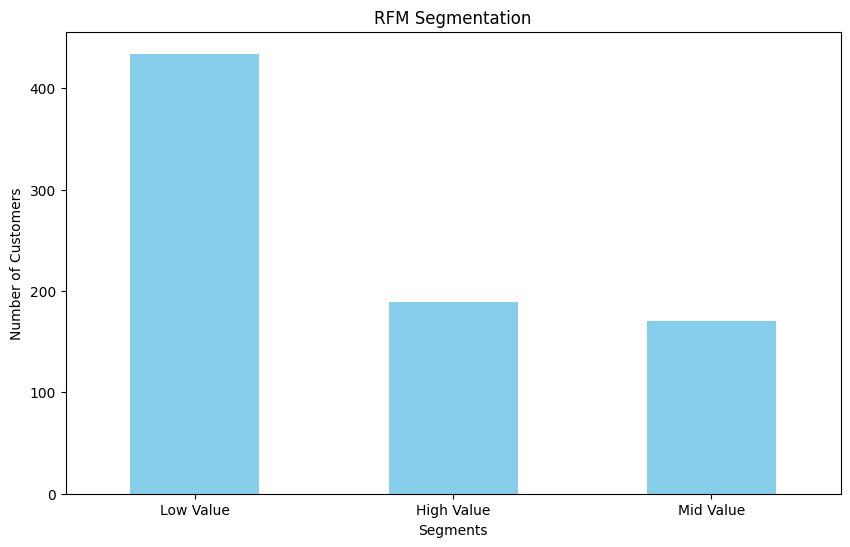

In [78]:
# Calculate RFM metrics
current_date = data['Order Date'].max()

rfm = data.groupby('Customer ID').agg({
    'Order Date': lambda x: (current_date - x.max()).days,  # Recency
    'Customer ID': 'size',  # Frequency
    'Sales': 'sum'  # Monetary
})

# Rename columns for clarity
rfm.rename(columns={
    'Order Date': 'Recency',
    'Customer ID': 'Frequency',
    'Sales': 'Monetary'
}, inplace=True)

# Print RFM table
print("RFM Table:")
print(rfm)

# Example of RFM segmentation (you can define your own segmentation logic based on quartiles)
def rfm_segment(row):
    if row['Recency'] <= 30 and row['Frequency'] >= 3 and row['Monetary'] >= 500:
        return 'High Value'
    elif row['Recency'] <= 60 and row['Frequency'] >= 2:
        return 'Mid Value'
    else:
        return 'Low Value'

# Apply segmentation
rfm['Segment'] = rfm.apply(rfm_segment, axis=1)

# Print segmented RFM table
print("\nSegmented RFM Table:")
print(rfm)


plt.figure(figsize=(10, 6))
segment_counts = rfm['Segment'].value_counts()
segment_counts.plot(kind='bar', color='skyblue')
plt.title('RFM Segmentation')
plt.xlabel('Segments')
plt.ylabel('Number of Customers')
plt.xticks(rotation=0)
plt.show()